In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PLA import PlaPocket
from Regressao_Logistica import RegressaoLogistica
from regressao_linear import RegressaoLinear
import funcoes as f
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Leitura das imagens e filtro

In [2]:
#f.read("Dados/test.csv")
#f.read("Dados/train.csv")

#f.filter("Dados/test_reduzido.csv", 4, 5)
#f.filter("Dados/train_reduzido.csv", 4, 5)

#### Dados De Treino e Teste Dos Dígitos 1 e 5

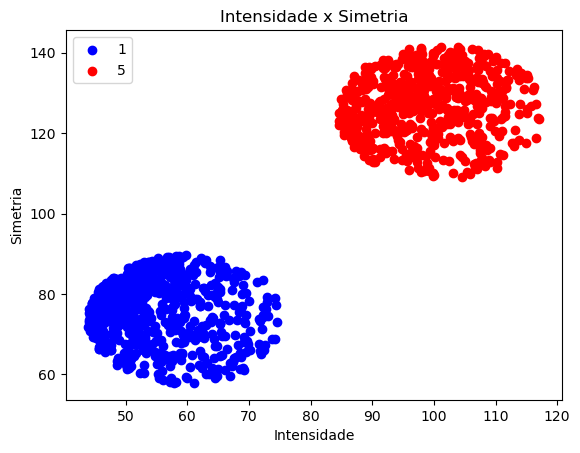

In [3]:
train_1x5 = pd.read_csv("Dados/train_reduzido_filter_1_5.csv", sep=";")
test_1x5 = pd.read_csv("Dados/test_reduzido_filter_1_5.csv", sep=";")

# Separando os dados por classe
train_1 = train_1x5[train_1x5['label'] == 1]
train_5 = train_1x5[train_1x5['label'] == 5]

# Plotando os pontos para cada classe com cores diferentes e legendas
plt.scatter(train_1["intensidade"], train_1["simetria"], c='blue', label='1')
plt.scatter(train_5["intensidade"], train_5["simetria"], c='red', label='5')

plt.xlabel("Intensidade")
plt.ylabel("Simetria")
plt.title("Intensidade x Simetria")
plt.legend()
plt.show()


### Preparação dos Dados Para o Treino

In [4]:
# x treino
X = train_1x5[["intensidade", "simetria"]].values

# Padronizando os dados
X_treino = f.padronizar(X)

### Treinando o modelo PLA

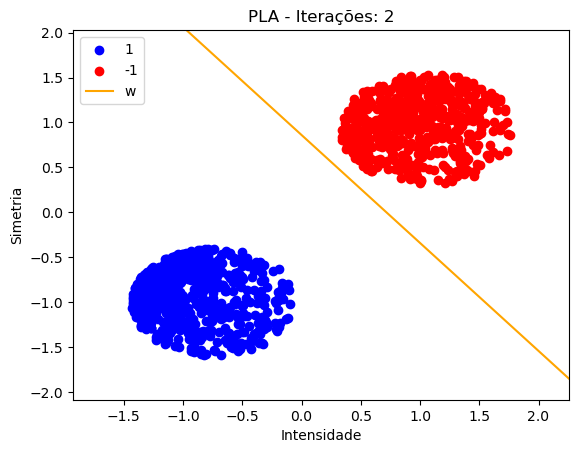

In [5]:
#ajustando os valores de y para o PLA
y = train_1x5["label"]
# substitui os valores de y por 1 ou -1
y = y.replace(1, 1)
y = y.replace(5, -1)
y = y.values  

pla = PlaPocket(X_treino, y)
pla.fit()
pla.plot()

### Treinando o Modelo Regressão Linear

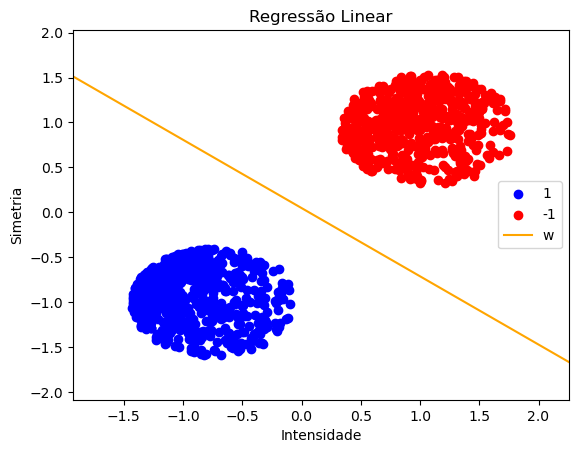

In [6]:
# Ajustando os valores de y para a regresão linear
y = train_1x5["label"]
# substitui os valores de y por 1 e -1
y = y.replace(1, 1)
y = y.replace(5, -1)
y = y.values

regressao_linear = RegressaoLinear(X_treino, y)
regressao_linear.fit()
regressao_linear.plot()

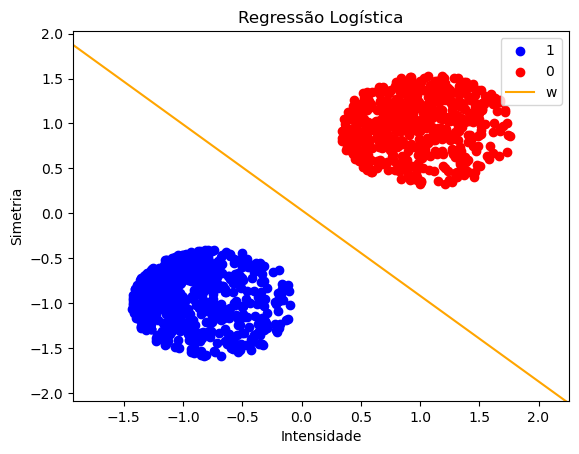

In [7]:
# Ajustando os valores de y para a regresaão logística
y = train_1x5["label"]
# substitui os valores de y por 0 ou 1
y = y.replace(1, 1)
y = y.replace(5, 0)
y = y.values

regressao_logistica = RegressaoLogistica(X_treino, y)
regressao_logistica.fit()
regressao_logistica.plot()


### Preparando Dados de Teste

In [8]:
X = test_1x5[["intensidade", "simetria"]].values
y_true = test_1x5["label"].values

# Padronizando os dados
X_test = f.padronizar(X)

### Acuracia PLA


Acurácia PLA
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       292
           5       1.00      1.00      1.00       291

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



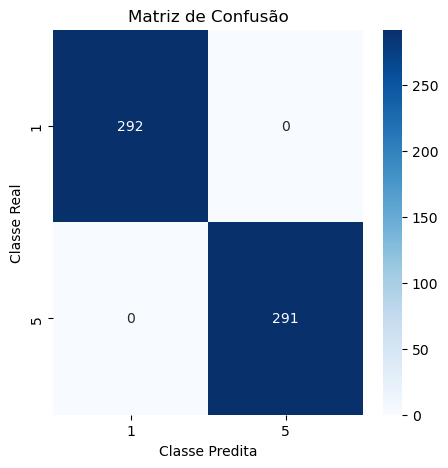

In [9]:
y_pla = pla.predict(X_test)
y_pla = pla.reverse_predict(y_pla, 1, 5)
pla.acuracia(y_true, y_pla, ["1", "5"])

### Acuracia Regressão Linear


Acurácia Regressão Logística
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       292
           5       1.00      1.00      1.00       291

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



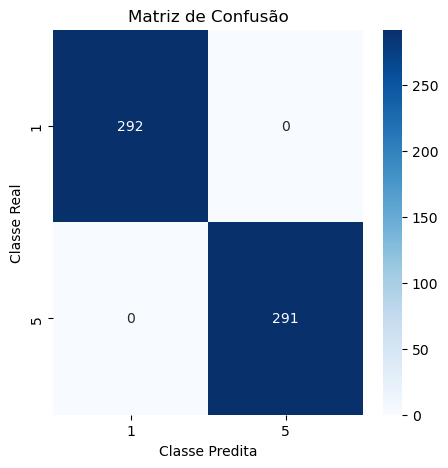

In [10]:
y_reglog = regressao_logistica.predict(X_test)
y_reglog = regressao_logistica.reverse_predict(y_reglog, 1, 5)
regressao_logistica.acuracia(y_true, y_reglog, ["1", "5"])

### Acuracia Regressão Logística



Acurácia Regressão Logística
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       292
           5       1.00      1.00      1.00       291

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



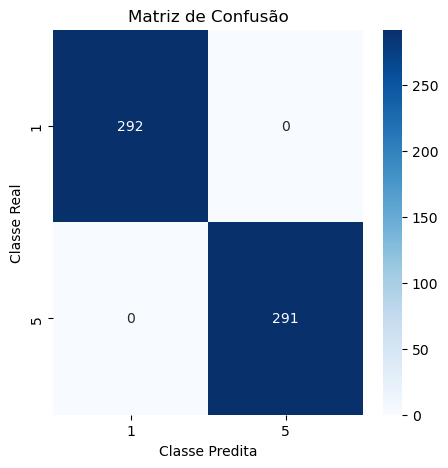

In [11]:
y_reglin = regressao_logistica.predict(X_test)
y_reglin = regressao_logistica.reverse_predict(y_reglin, 1, 5)
regressao_logistica.acuracia(y_true, y_reglin, ["1", "5"])